In [ ]:
import pandas as pd
import numpy as nm
import requests
import json
import MySQLdb
from bs4 import BeautifulSoup
import time

# Part 1: 


(a) Go to http://www.omdbapi.com/ and make yourself familiar with the API and its use. 
Request an API Key from the page. Specifically, read "Usage", "Parameters", and "Examples", 
and write down the URL string that would search for all the movies containing the word "blade". 
Include it as a comment in your code script.


In [183]:
# "http://www.omdbapi.com/?s=blade&apikey=cf6a4645"

(b) Write a program in Python or Java that executes the above API call and prints the result to the screen. You can use the parameters "Plot: Short" and "Response: JSON". (0.1 bonus points: make your code pretty-print the returned JSON. You may use a package to do so.)

In [108]:
parameters = {
    "plot": "short",
    "r": "json",
    "apikey": "cf6a4645",
    'i': 'tt0110912'
}

response = requests.get("http://www.omdbapi.com/", params=parameters)


In [109]:
movie_api = response.json()

In [100]:
Rotten_Tomatoes_rating_1 = movie_api['Ratings'][1]['Value']
Rotten_Tomatoes_rating = float(Rotten_Tomatoes_rating_1.replace("%",''))

Metacritic_rating_1 = float(re.findall(r'[0-9]{2}',movie_api['Ratings'][2]['Value'])[0])

Director = movie_api['Director']
Actors = movie_api['Actors']
Genre = movie_api['Genre']
Released_Date = movie_api['Released']


'Tim Roth, Amanda Plummer, Laura Lovelace, John Travolta'

In [110]:
movie_api

{'Title': 'Pulp Fiction',
 'Year': '1994',
 'Rated': 'R',
 'Released': '14 Oct 1994',
 'Runtime': '154 min',
 'Genre': 'Crime, Drama',
 'Director': 'Quentin Tarantino',
 'Writer': 'Quentin Tarantino (stories), Roger Avary (stories), Quentin Tarantino',
 'Actors': 'Tim Roth, Amanda Plummer, Laura Lovelace, John Travolta',
 'Plot': 'The lives of two mob hitmen, a boxer, a gangster and his wife, and a pair of diner bandits intertwine in four tales of violence and redemption.',
 'Language': 'English, Spanish, French',
 'Country': 'USA',
 'Awards': 'Won 1 Oscar. Another 68 wins & 74 nominations.',
 'Poster': 'https://m.media-amazon.com/images/M/MV5BNGNhMDIzZTUtNTBlZi00MTRlLWFjM2ItYzViMjE3YzI5MjljXkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_SX300.jpg',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '8.9/10'},
  {'Source': 'Rotten Tomatoes', 'Value': '92%'},
  {'Source': 'Metacritic', 'Value': '94/100'}],
 'Metascore': '94',
 'imdbRating': '8.9',
 'imdbVotes': '1,721,422',
 'imdbID': 'tt0110

In [186]:
def jprint(obj):
    # create a formatted string of the Python JSON object
    text = json.dumps(obj, sort_keys=True, indent=4)
    print(text)

jprint(response.json())

{
    "Response": "True",
    "Search": [
        {
            "Poster": "https://m.media-amazon.com/images/M/MV5BNzQzMzJhZTEtOWM4NS00MTdhLTg0YjgtMjM4MDRkZjUwZDBlXkEyXkFqcGdeQXVyNjU0OTQ0OTY@._V1_SX300.jpg",
            "Title": "Blade Runner",
            "Type": "movie",
            "Year": "1982",
            "imdbID": "tt0083658"
        },
        {
            "Poster": "https://m.media-amazon.com/images/M/MV5BNzA1Njg4NzYxOV5BMl5BanBnXkFtZTgwODk5NjU3MzI@._V1_SX300.jpg",
            "Title": "Blade Runner 2049",
            "Type": "movie",
            "Year": "2017",
            "imdbID": "tt1856101"
        },
        {
            "Poster": "https://m.media-amazon.com/images/M/MV5BOTk2NDNjZWQtMGY0Mi00YTY2LWE5MzctMGRhZmNlYzljYTg5XkEyXkFqcGdeQXVyMTAyNjg4NjE0._V1_SX300.jpg",
            "Title": "Blade",
            "Type": "movie",
            "Year": "1998",
            "imdbID": "tt0120611"
        },
        {
            "Poster": "https://m.media-amazon.com/images/M/MV5BOWVj

(c) Parse the JSON string in (b) to an internal Python or Java object for further handling. Then write code that iterates through the search results and prints the imdbID results to the screen.

In [187]:

search_result = response.json()['Search']

for movie in search_result:
    print(movie['imdbID'])
    

tt0083658
tt1856101
tt0120611
tt0187738
tt0359013
tt0117666
tt3672840
tt5084170
tt0475723
tt7428594


In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns# Part 1: 


(a) Go to http://www.omdbapi.com/ and make yourself familiar with the API and its use. 
Request an API Key from the page. Specifically, read "Usage", "Parameters", and "Examples", 
and write down the URL string that would search for all the movies containing the word "blade". 
Include it as a comment in your code script.


# "http://www.omdbapi.com/?s=blade&apikey=cf6a4645"

(b) Write a program in Python or Java that executes the above API call and prints the result to the screen. You can use the parameters "Plot: Short" and "Response: JSON". (0.1 bonus points: make your code pretty-print the returned JSON. You may use a package to do so.)

parameters = {
    "plot": "short",
    "r": "json",
    "apikey": "cf6a4645",
    'i': 'tt0110912'
}

response = requests.get("http://www.omdbapi.com/", params=parameters)


movie_api = response.json()

Rotten_Tomatoes_rating_1 = movie_api['Ratings'][1]['Value']
Rotten_Tomatoes_rating = float(Rotten_Tomatoes_rating_1.replace("%",''))

Metacritic_rating_1 = float(re.findall(r'[0-9]{2}',movie_api['Ratings'][2]['Value'])[0])

Director = movie_api['Director']
Actors = movie_api['Actors']
Genre = movie_api['Genre']
Released_Date = movie_api['Released']


movie_api

def jprint(obj):
    # create a formatted string of the Python JSON object
    text = json.dumps(obj, sort_keys=True, indent=4)
    print(text)

jprint(response.json())

(c) Parse the JSON string in (b) to an internal Python or Java object for further handling. Then write code that iterates through the search results and prints the imdbID results to the screen.


search_result = response.json()['Search']

for movie in search_result:
    print(movie['imdbID'])


# Date Clean 

In [2]:
movie_data_1 = pd.read_csv("movie.csv")

In [16]:
movie_data_1.shape

(9182, 14)

Actors, directors and genre

In [17]:
# split actors, directors and genre
# only keep the main director and the main genre
# keep four actors
Actors = movie_data_1['Actors'].str.split(",", n = 3, expand = True)
Actors.columns = ['Actor_1', 'Actor_2', 'Actor_3', 'Actor_4']
director = movie_data_1['Director'].str.split(",", n = 1, expand = True)
director.columns = ['Director', 'Other']
genre = movie_data_1['Genre'].str.split(",", n = 1, expand = True)
genre.columns = ['Genre', 'Other']
movie_data_2 = pd.concat([movie_data_1.drop(columns=['Actors', 'Director','Genre']),Actors,director['Director'],genre['Genre']], axis = 1)

 Released Date

In [18]:
# convert Released Date cloumn into Date format
movie_data_2['Released'] = pd.to_datetime(movie_data_2['Released'])

Popularity

In [20]:
# if popularity is nan, then 0, else 1
movie_data_2['popularity']=np.where(np.isnan(movie_data_2['popularity']),0, movie_data_2['popularity'])
movie_data_2['popularity']=np.where(movie_data_2['popularity'] != 0, 1, movie_data_2['popularity'])

Rewards

In [21]:
# If the movie won at least once Oscar, then "Oscar"
# If the movie hasnt won an Oscar but won other rewards, then "Others"
# If the movie has never won a reward, then "None"
movie_data_3 = movie_data_2
movie_data_3["Awards"] = movie_data_3["Awards"].astype(str)
Awards = []
for i in range(len(movie_data_3["Awards"])):
    if 'Oscar' in movie_data_3['Awards'][i]:
        Awards.append('Oscar')
    elif 'nan' in movie_data_3["Awards"][i]:
        Awards.append('None')
    else: 
        Awards.append('Others')
movie_data_3['Awards'] = Awards

In [22]:
movie_data_3.shape

(9182, 17)

Drop useless data

In [8]:
# only keep movies have budget and gross US sales data
movie_data_4 = movie_data_3[movie_data_3["budget"]!=0]
movie_data_5 = movie_data_4[movie_data_4["gross_US_sales"]!=0]

In [9]:
movie_data_6 = movie_data_5.drop(columns=['weekend_US_sales', 'worldwide_gross_sales'])
movie_data_6.shape

(4845, 15)

In [10]:
movie_data_6.head()

,movie_id,Awards,Released,budget,critic_review,gross_US_sales,imdbRating,popularity,user_review,Actor_1,Actor_2,Actor_3,Actor_4,Director,Genre
0,tt0110912,Oscar,1994-10-14,8000000,282,107928762,8.9,1.0,2839,Tim Roth,Amanda Plummer,Laura Lovelace,John Travolta,Quentin Tarantino,Crime
1,tt1872181,Others,2014-05-02,200000000,536,202853933,6.6,1.0,1162,Andrew Garfield,Emma Stone,Jamie Foxx,Dane DeHaan,Marc Webb,Action
2,tt0111161,Oscar,1994-10-14,25000000,224,28699976,9.3,1.0,7361,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,Frank Darabont,Drama
3,tt0076759,Oscar,1977-05-25,11000000,181,460998507,8.6,1.0,1765,Mark Hamill,Harrison Ford,Carrie Fisher,Peter Cushing,George Lucas,Action
4,tt0088763,Oscar,1985-07-03,19000000,235,211159762,8.5,1.0,1078,Michael J. Fox,Christopher Lloyd,Lea Thompson,Crispin Glover,Robert Zemeckis,Adventure


inflation

In [11]:
# take inflation into consideration 
inflation = pd.read_csv("cumulative_inflation.csv")
inflation.head()

,Year,inflation
0,1972,5.081035
1,1973,4.581944
2,1974,3.979653
3,1975,3.648273
4,1976,3.425411


In [12]:
movie_data_6['Year'] = movie_data_6['Released'].dt.year 
merged_inner = pd.merge(left=movie_data_6, right=inflation, left_on='Year', right_on='Year')
merged_inner.head()

,movie_id,Awards,Released,budget,critic_review,gross_US_sales,imdbRating,popularity,user_review,Actor_1,Actor_2,Actor_3,Actor_4,Director,Genre,Year,inflation
0,tt0110912,Oscar,1994-10-14,8000000,282,107928762,8.9,1.0,2839,Tim Roth,Amanda Plummer,Laura Lovelace,John Travolta,Quentin Tarantino,Crime,1994.0,0.721812
1,tt0111161,Oscar,1994-10-14,25000000,224,28699976,9.3,1.0,7361,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,Frank Darabont,Drama,1994.0,0.721812
2,tt0110357,Oscar,1994-06-24,45000000,227,422783777,8.5,1.0,927,Rowan Atkinson,Matthew Broderick,Niketa Calame-Harris,Jim Cummings,Roger Allers,Animation,1994.0,0.721812
3,tt0106677,Others,1994-02-10,6900000,169,7993039,7.6,1.0,458,Jason London,Joey Lauren Adams,Milla Jovovich,Shawn Andrews,Richard Linklater,Comedy,1994.0,0.721812
4,tt0109506,Others,1994-05-13,23000000,149,50693129,7.6,1.0,595,Brandon Lee,Rochelle Davis,Ernie Hudson,Michael Wincott,Alex Proyas,Action,1994.0,0.721812


Budge, gross_US_sales and profit. (million)

In [13]:
# mutiple cumulative inflation with budge, gross_US_sales and profit. (million)
movie_inflation = merged_inner.drop(columns=['Year','inflation'])
movie_inflation['budget'] = merged_inner['budget'] *(1+merged_inner['inflation'])/1000000
movie_inflation['gross_US_sales'] = merged_inner['gross_US_sales'] *(1+merged_inner['inflation'])/1000000
movie_inflation['profit'] = movie_inflation['gross_US_sales'] - movie_inflation['budget']
movie_inflation.head()

,movie_id,Awards,Released,budget,critic_review,gross_US_sales,imdbRating,popularity,user_review,Actor_1,Actor_2,Actor_3,Actor_4,Director,Genre,profit
0,tt0110912,Oscar,1994-10-14,13.774497,282,185.833051,8.9,1.0,2839,Tim Roth,Amanda Plummer,Laura Lovelace,John Travolta,Quentin Tarantino,Crime,172.058554
1,tt0111161,Oscar,1994-10-14,43.045303,224,49.415967,9.3,1.0,7361,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,Frank Darabont,Drama,6.370664
2,tt0110357,Oscar,1994-06-24,77.481546,227,727.954233,8.5,1.0,927,Rowan Atkinson,Matthew Broderick,Niketa Calame-Harris,Jim Cummings,Roger Allers,Animation,650.472688
3,tt0106677,Others,1994-02-10,11.880504,169,13.762511,7.6,1.0,458,Jason London,Joey Lauren Adams,Milla Jovovich,Shawn Andrews,Richard Linklater,Comedy,1.882008
4,tt0109506,Others,1994-05-13,39.601679,149,87.284044,7.6,1.0,595,Brandon Lee,Rochelle Davis,Ernie Hudson,Michael Wincott,Alex Proyas,Action,47.682365


Number of movies that make profit 2459
Number of movies that lose profit 2382
Average profit 21.8390619816945


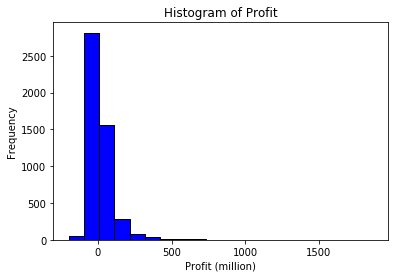

In [14]:
# see the profit distribution
plt.hist(movie_inflation['profit'], color = 'blue', edgecolor = 'black', bins= 20)
plt.title('Histogram of Profit')
plt.xlabel('Profit (million)')
plt.ylabel('Frequency')
print("Number of movies that make profit",len(movie_inflation[movie_inflation['profit'] > 0]))
print("Number of movies that lose profit",len(movie_inflation[movie_inflation['profit'] < 0]))
print("Average profit",mean(movie_inflation['profit']))

In [15]:
movie_inflation

,movie_id,Awards,Released,budget,critic_review,gross_US_sales,imdbRating,popularity,user_review,Actor_1,Actor_2,Actor_3,Actor_4,Director,Genre,profit
0,tt0110912,Oscar,1994-10-14,13.774497,282,185.833051,8.9,1.0,2839,Tim Roth,Amanda Plummer,Laura Lovelace,John Travolta,Quentin Tarantino,Crime,172.058554
1,tt0111161,Oscar,1994-10-14,43.045303,224,49.415967,9.3,1.0,7361,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,Frank Darabont,Drama,6.370664
2,tt0110357,Oscar,1994-06-24,77.481546,227,727.954233,8.5,1.0,927,Rowan Atkinson,Matthew Broderick,Niketa Calame-Harris,Jim Cummings,Roger Allers,Animation,650.472688
3,tt0106677,Others,1994-02-10,11.880504,169,13.762511,7.6,1.0,458,Jason London,Joey Lauren Adams,Milla Jovovich,Shawn Andrews,Richard Linklater,Comedy,1.882008
4,tt0109506,Others,1994-05-13,39.601679,149,87.284044,7.6,1.0,595,Brandon Lee,Rochelle Davis,Ernie Hudson,Michael Wincott,Alex Proyas,Action,47.682365
5,tt0109686,Others,1994-12-16,29.270806,93,218.972101,7.3,1.0,466,Jim Carrey,Jeff Daniels,Lauren Holly,Mike Starr,Peter Farrelly,Comedy,189.701295
6,tt0108550,Oscar,1994-03-04,18.939933,87,17.274536,7.8,1.0,337,Johnny Depp,Leonardo DiCaprio,Juliette Lewis,Mary Steenburgen,Lasse Hallström,Drama,-1.665397
7,tt0111503,Oscar,1994-07-15,198.008394,95,251.870829,7.2,1.0,387,Arnold Schwarzenegger,Jamie Lee Curtis,Tom Arnold,Bill Paxton,James Cameron,Action,53.862435
8,tt0109040,Others,1994-02-04,25.827182,80,124.344788,6.9,1.0,278,Jim Carrey,Courteney Cox,Sean Young,Tone Loc,Tom Shadyac,Comedy,98.517606
9,tt0110632,Others,1994-08-26,58.541612,157,86.577476,7.3,1.0,626,Woody Harrelson,Juliette Lewis,Tom Sizemore,Rodney Dangerfield,Oliver Stone,Action,28.035864


profitability

In [16]:
# classy profitability into Gain or Loss
movie_inflation['profitability'] = np.where(movie_inflation['profit'] > 0, 'Gain', 'Loss')
movie_inflation.head()

,movie_id,Awards,Released,budget,critic_review,gross_US_sales,imdbRating,popularity,user_review,Actor_1,Actor_2,Actor_3,Actor_4,Director,Genre,profit,profitability
0,tt0110912,Oscar,1994-10-14,13.774497,282,185.833051,8.9,1.0,2839,Tim Roth,Amanda Plummer,Laura Lovelace,John Travolta,Quentin Tarantino,Crime,172.058554,Gain
1,tt0111161,Oscar,1994-10-14,43.045303,224,49.415967,9.3,1.0,7361,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,Frank Darabont,Drama,6.370664,Gain
2,tt0110357,Oscar,1994-06-24,77.481546,227,727.954233,8.5,1.0,927,Rowan Atkinson,Matthew Broderick,Niketa Calame-Harris,Jim Cummings,Roger Allers,Animation,650.472688,Gain
3,tt0106677,Others,1994-02-10,11.880504,169,13.762511,7.6,1.0,458,Jason London,Joey Lauren Adams,Milla Jovovich,Shawn Andrews,Richard Linklater,Comedy,1.882008,Gain
4,tt0109506,Others,1994-05-13,39.601679,149,87.284044,7.6,1.0,595,Brandon Lee,Rochelle Davis,Ernie Hudson,Michael Wincott,Alex Proyas,Action,47.682365,Gain


Director Power

In [17]:
# calculate director power - summing up the profit of all movies that director directed previously 
director_power_vec = []
avg_director_power = mean(movie_inflation.groupby('Director')['profit'].sum())
for i in range(len(movie_inflation['Director'])):
    director = movie_inflation[movie_inflation['Director'].isin([movie_inflation['Director'][i]])].reset_index(drop=True)
    director_power = 0
    for j in range(len(director)):
        if movie_inflation['Released'][i]>director['Released'][j]:
            #print(director['profit'][j])
            director_power += director['profit'][j]
        else: director_power += 0
    if director_power == 0:
        director_power = avg_director_power
    director_power_vec.append(director_power)
    
movie_inflation['director_power'] = director_power_vec

Actor Star Power

In [18]:
data1 = movie_inflation
data1['Actor_2']=data1['Actor_2'].str.strip()
data1['Actor_3']=data1['Actor_3'].str.strip()
data1['Actor_4']=data1['Actor_4'].str.strip()

In [19]:
# calculate actor star power - summing up the profit of all movies in which all four stars starred previously 
#Actor 1's star power
actor_power_vec1 = []
for i in range(len(data1)):
    actor1 = data1[data1['Actor_1'].isin([data1['Actor_1'][i]])]
    actor2 = data1[data1['Actor_2'].isin([data1['Actor_1'][i]])]
    actor3 = data1[data1['Actor_3'].isin([data1['Actor_1'][i]])]
    actor4 = data1[data1['Actor_4'].isin([data1['Actor_1'][i]])]
    actor =  pd.concat([actor1,actor2,actor3,actor4]).reset_index(drop=True)
    actor_power = 0
    for j in range(len(actor)):
        if data1['Released'][i]>actor['Released'][j]:
            #print(director['profit'][j])
            actor_power += actor['profit'][j]
        else: actor_power += 0
    actor_power_vec1.append(actor_power)

#Actor 2's star power
actor_power_vec2 = []
for i in range(len(data1)):
    if data1['Actor_2'][i] is not None:
        actor1 = data1[data1['Actor_1'].isin([data1['Actor_2'][i]])]
        actor2 = data1[data1['Actor_2'].isin([data1['Actor_2'][i]])]
        actor3 = data1[data1['Actor_3'].isin([data1['Actor_2'][i]])]
        actor4 = data1[data1['Actor_4'].isin([data1['Actor_2'][i]])]
        actor =  pd.concat([actor1,actor2,actor3,actor4]).reset_index(drop=True)
    else:
        actor = pd.DataFrame()
    
    actor_power = 0
    for j in range(len(actor)):
        if data1['Released'][i]>actor['Released'][j]:
            #print(director['profit'][j])
            actor_power += actor['profit'][j]
        else: actor_power += 0
    actor_power_vec2.append(actor_power)

#Actor 3's star power
actor_power_vec3 = []
for i in range(len(data1)):
    if data1['Actor_3'][i] is not None:
        actor1 = data1[data1['Actor_1'].isin([data1['Actor_3'][i]])]
        actor2 = data1[data1['Actor_2'].isin([data1['Actor_3'][i]])]
        actor3 = data1[data1['Actor_3'].isin([data1['Actor_3'][i]])]
        actor4 = data1[data1['Actor_4'].isin([data1['Actor_3'][i]])]
        actor =  pd.concat([actor1,actor2,actor3,actor4]).reset_index(drop=True)
    else:
        actor = pd.DataFrame()
    
    actor_power = 0
    for j in range(len(actor)):
        if data1['Released'][i]>actor['Released'][j]:
            #print(director['profit'][j])
            actor_power += actor['profit'][j]
        else: actor_power += 0
    actor_power_vec3.append(actor_power)

    

#Actor 4's star power
actor_power_vec4 = []
for i in range(len(data1)):
    if data1['Actor_4'][i] is not None:
        actor1 = data1[data1['Actor_1'].isin([data1['Actor_4'][i]])]
        actor2 = data1[data1['Actor_2'].isin([data1['Actor_4'][i]])]
        actor3 = data1[data1['Actor_3'].isin([data1['Actor_4'][i]])]
        actor4 = data1[data1['Actor_4'].isin([data1['Actor_4'][i]])]
        actor =  pd.concat([actor1,actor2,actor3,actor4]).reset_index(drop=True)
    else:
        actor = pd.DataFrame()
    
    actor_power = 0
    for j in range(len(actor)):
        if data1['Released'][i]>actor['Released'][j]:
            #print(director['profit'][j])
            actor_power += actor['profit'][j]
        else: actor_power += 0
    actor_power_vec4.append(actor_power)


In [27]:
data2 = data1
data2['Actor_1_power'] = actor_power_vec1
data2['Actor_2_power'] = actor_power_vec2
data2['Actor_3_power'] = actor_power_vec3
data2['Actor_4_power'] = actor_power_vec4

mean_starpower = mean([mean(actor_power_vec1),mean(actor_power_vec2),mean(actor_power_vec3),mean(actor_power_vec4)])

star_power1 = data2[['Actor_1_power','Actor_2_power','Actor_3_power','Actor_4_power']].replace(0,mean_starpower)
star_power = star_power1['Actor_1_power']+star_power1['Actor_2_power']+star_power1['Actor_3_power']+star_power1['Actor_4_power']
data2['total_star_power'] = star_power
data2['Month'] = data2['Released'].dt.month

In [29]:
movie_data = data2
movie_data.head()

,movie_id,Awards,Released,budget,critic_review,gross_US_sales,imdbRating,popularity,user_review,Actor_1,...,Genre,profit,profitability,director_power,Actor_1_power,Actor_2_power,Actor_3_power,Actor_4_power,total_star_power,Month
0,tt0110912,Oscar,1994-10-14,13.774497,282,185.833051,8.9,1.0,2839,Tim Roth,...,Crime,172.058554,Gain,2.964077,2.964077,-14.864535,0.000000,1465.474724,1584.859251,10
1,tt0111161,Oscar,1994-10-14,43.045303,224,49.415967,9.3,1.0,7361,Tim Robbins,...,Drama,6.370664,Gain,53.830397,8.706427,604.129092,0.000000,85.525203,829.645707,10
2,tt0110357,Oscar,1994-06-24,77.481546,227,727.954233,8.5,1.0,927,Rowan Atkinson,...,Animation,650.472688,Gain,53.830397,0.000000,335.404772,0.000000,0.000000,729.259728,6
3,tt0106677,Others,1994-02-10,11.880504,169,13.762511,7.6,1.0,458,Jason London,...,Comedy,1.882008,Gain,53.830397,0.000000,0.000000,-15.319906,0.000000,378.535050,2
4,tt0109506,Others,1994-05-13,39.601679,149,87.284044,7.6,1.0,595,Brandon Lee,...,Action,47.682365,Gain,53.830397,-10.705123,0.000000,143.939001,0.000000,395.803849,5


In [31]:
movie_data.to_excel("model_data.xlsx")  

# Exploratory  Data Analysis

In [9]:
data = pd.read_excel("model_data.xlsx")
data = data.drop(columns =['Unnamed: 0'])
data.columns

Index(['movie_id', 'Awards', 'Released', 'budget', 'critic_review',
       'gross_US_sales', 'imdbRating', 'popularity', 'user_review', 'Actor_1',
       'Actor_2', 'Actor_3', 'Actor_4', 'Director', 'Genre', 'profit',
       'profitability', 'director_power', 'Actor_1_power', 'Actor_2_power',
       'Actor_3_power', 'Actor_4_power', 'total_star_power', 'Month'],
      dtype='object')

In [11]:
print("data size: ", data.shape)

data size:  (4841, 24)


col_0             count
profitability          
Gain           0.507953
Loss           0.492047


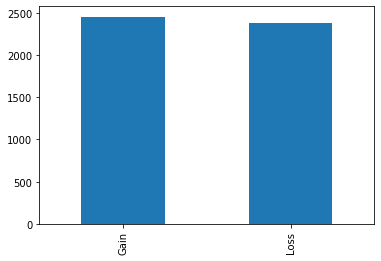

In [155]:
# Profit distribution
data['profitability'].value_counts().plot(kind='bar')

awards_tab = pd.crosstab(index=data['profitability'], columns="count")           
print(awards_tab/awards_tab.sum())

col_0      count
Awards          
None    0.134063
Oscar   0.194588
Others  0.671349


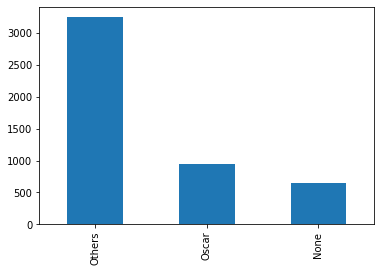

In [159]:
# Awards distribution
data['Awards'].value_counts().plot(kind='bar')

awards_tab = pd.crosstab(index=data['Awards'], columns="count")           
print(awards_tab/awards_tab.sum())

col_0         count
Released           
70s        4.482545
80s       15.492667
90s       27.205123
00s       33.443503
10s       19.376162
col_0         count
Released           
1          7.498451
2          7.643049
3          8.572609
4          7.849618
5          7.539765
6          8.159471
7          7.808304
8          9.481512
9          7.808304
10        10.039248
11         9.109688
12         8.489981


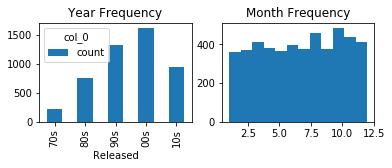

In [131]:
# Released Date
from matplotlib import pyplot as PLT

fig = PLT.figure()

ax1 = fig.add_subplot(221)
year_tab =  pd.crosstab(index=pd.cut(data['Released'].dt.year, 5, labels=['70s', '80s', '90s', '00s','10s']),columns="count")  
print(year_tab/year_tab.sum()*100)
year_tab.plot(kind = "bar",ax= ax1)
plt.title("Year Frequency")


month_tab = pd.crosstab(index=data['Released'].dt.month, columns="count")           
print(month_tab/month_tab.sum()*100)
ax2 = fig.add_subplot(222)
ax2.hist(data['Released'].dt.month, bins = 12)
plt.title("Month Frequency")


PLT.show()

col_0     count    prob
Released               
70s         217   4.48%
80s         750  15.49%
90s        1317  27.21%
00s        1619  33.44%
10s         938  19.38%


Text(0.5, 1.0, 'Year Frequency')

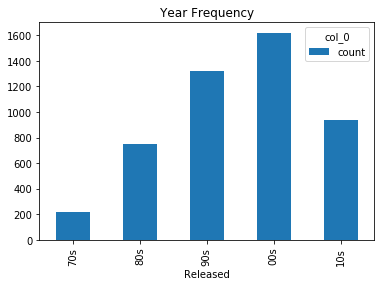

In [152]:
year_tab =  pd.crosstab(index=pd.cut(data['Released'].dt.year, 5, labels=['70s', '80s', '90s', '00s','10s']),columns="count")  
year_tab['prob'] = year_tab/year_tab.sum()
year_tab['prob'] = year_tab['prob'].apply(lambda x: format(x, '.2%'))  
print(year_tab)
year_tab.plot(kind = "bar")
plt.title("Year Frequency")


col_0     count    prob
Released               
1           363   7.50%
2           370   7.64%
3           415   8.57%
4           380   7.85%
5           365   7.54%
6           395   8.16%
7           378   7.81%
8           459   9.48%
9           378   7.81%
10          486  10.04%
11          441   9.11%
12          411   8.49%


Text(0.5, 1.0, 'Month Frequency')

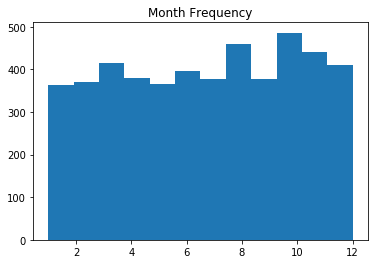

In [161]:
month_tab = pd.crosstab(index=data['Released'].dt.month, columns="count")  
month_tab['prob'] = month_tab/month_tab.sum()
month_tab['prob'] = month_tab['prob'].apply(lambda x: format(x, '.2%'))  
print(month_tab)

plt.hist(data['Released'].dt.month, bins = 12)
plt.title("Month Frequency")

col_0       count    prob
popularity               
0            2471  51.04%
1            2370  48.96%


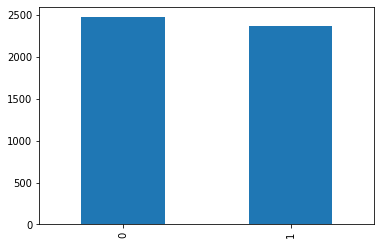

In [163]:
# Popularity distribution
data['popularity'].value_counts().plot(kind='bar')

pop_tab = pd.crosstab(index=data['popularity'], columns="count")   
pop_tab['prob'] = pop_tab/pop_tab.sum()
pop_tab['prob'] = pop_tab['prob'].apply(lambda x: format(x, '.2%'))  
print(pop_tab)


# Model Building

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Dropout
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_excel("model_data.xlsx")

In [ ]:
#data.head()

In [ ]:
#data.columns

In [ ]:
#check whethere budget is 0
(data['budget']==0).sum()

0

In [ ]:
#check whethere budget is 0
(data['gross_US_sales']==0).sum()

0

In [ ]:
y = data['gross_US_sales']/data['budget']-1

In [ ]:
# log transform
y = np.log(1+y)

(array([  2.,   1.,   2.,   1.,   4.,   4.,   8.,  15.,  16.,  17.,  23.,
         26.,  56.,  60.,  67.,  88., 140., 244., 374., 654., 781., 850.,
        655., 376., 193.,  87.,  48.,  16.,  17.,   8.,   3.,   1.,   0.,
          0.,   0.,   2.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([-10.79021948, -10.27110647,  -9.75199346,  -9.23288044,
         -8.71376743,  -8.19465441,  -7.6755414 ,  -7.15642839,
         -6.63731537,  -6.11820236,  -5.59908935,  -5.07997633,
         -4.56086332,  -4.04175031,  -3.52263729,  -3.00352428,
         -2.48441127,  -1.96529825,  -1.44618524,  -0.92707223,
         -0.40795921,   0.1111538 ,   0.63026682,   1.14937983,
          1.66849284,   2.18760586,   2.70671887,   3.22583188,
          3.7449449 ,   4.26405791,   4.78317092,   5.30228394,
          5.82139695,   6.34050996,   6.85962298,   7.37873599,
          7.897849  ,   8.41696202,   8.93607503,   9.45518804,
          9.974301

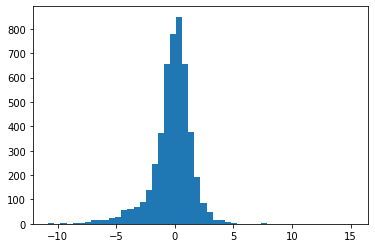

In [ ]:
plt.hist(y,bins=50)

In [ ]:
# selecet x variables
names = ['Awards', 
       'critic_review', 'imdbRating', 'popularity',
       'user_review',
       'Genre', 'director_power', 'Actor_1_power',
       'Actor_2_power', 'Actor_3_power', 'Actor_4_power', 'total_star_power',
       'Month']

In [ ]:
x = data[names]

In [ ]:
dummy1 = pd.get_dummies(x.Awards, prefix='award_').iloc[:,1:2]

In [ ]:
#dummy1

In [ ]:
dummy2 = pd.get_dummies(x.Genre, prefix='genre').iloc[:,1:]

In [ ]:
#dummy2

In [ ]:
dummy3 = pd.get_dummies(x.Month,prefix='month_').iloc[:,1:]

In [ ]:
#dummy3

In [ ]:
names = [
       'critic_review', 'imdbRating', 'popularity',
       'user_review',
        'director_power', 'Actor_1_power',
       'Actor_2_power', 'Actor_3_power', 'Actor_4_power', 'total_star_power',
       ]

In [ ]:
x = pd.concat([data[names],dummy1, dummy2, dummy3], axis = 1)

In [ ]:
# x variables with dummies
x

,critic_review,imdbRating,popularity,user_review,director_power,Actor_1_power,Actor_2_power,Actor_3_power,Actor_4_power,total_star_power,...,month__3,month__4,month__5,month__6,month__7,month__8,month__9,month__10,month__11,month__12
0,282,8.9,1,2839,2.964077,2.964077,-14.864535,0.000000,1465.474724,1584.859251,...,0,0,0,0,0,0,0,1,0,0
1,224,9.3,1,7361,53.830397,8.706427,604.129092,0.000000,85.525203,829.645707,...,0,0,0,0,0,0,0,1,0,0
2,227,8.5,1,927,53.830397,0.000000,335.404772,0.000000,0.000000,729.259728,...,0,0,0,1,0,0,0,0,0,0
3,169,7.6,1,458,53.830397,0.000000,0.000000,-15.319906,0.000000,378.535050,...,0,0,0,0,0,0,0,0,0,0
4,149,7.6,1,595,53.830397,-10.705123,0.000000,143.939001,0.000000,395.803849,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4836,13,5.7,0,13,53.830397,0.000000,118.993072,0.000000,0.000000,512.848027,...,0,0,1,0,0,0,0,0,0,0
4837,103,6.2,1,97,-10.006600,-32.125892,61.887171,0.000000,0.000000,292.331249,...,0,0,0,0,0,0,1,0,0,0
4838,288,5.7,1,323,12.365999,0.000000,0.000000,0.000000,0.000000,525.139941,...,0,0,0,0,0,0,0,1,0,0
4839,329,5.5,1,447,252.524894,419.305319,142.482283,-4.591997,14.040630,571.236236,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
#investment returns
y

0       2.602030
1       0.138020
2       2.240198
3       0.147050
4       0.790296
          ...   
4836    0.231677
4837   -2.320490
4838   -1.465307
4839   -0.172626
4840    0.833226
Length: 4841, dtype: float64

In [ ]:
#Standardize the features

sc = StandardScaler()
x = sc.fit_transform(x)

## Random Forest


In [ ]:
# Y as continuous

# Split into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

NameError: name 'train_test_split' is not defined

In [ ]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(x_train,y_train)

#Predict
y_pred = rf.predict(x_test)

In [ ]:
# Model Accuracy
error =abs(y_pred  - y_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
# Y as categorical
y_cat = y.copy()
ctgy = lambda x: -2 if x<-0.5 else (-1 if x <= 0 and x>=-0.5 else (1 if x>0 and x<1 else 2))
y_cat = y_cat.apply(ctgy)

# Split into train and test
x_train,x_test,y_train_cat,y_test_cat = train_test_split(x,y_cat,test_size = 0.2)

In [ ]:
# Instantiate model with 1000 decision trees
rf_class = RandomForestClassifier(n_estimators=1000, random_state = 42)
# Train the model using the training data
rf_class.fit(x_train,y_train_cat)

#Predict
y_pred_cat=rf_class.predict(x_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_cat, y_pred_cat))

## Neural Network

In [ ]:

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [ ]:
# Neural network
model = Sequential()
model.add(Dense(20, input_dim=38, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
history = model.fit(x_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
3872/3872 [==============================] - 0s 35us/step - loss: 3.4533
Epoch 2/100
3872/3872 [==============================] - 0s 20us/step - loss: 2.9612
Epoch 3/100
3872/3872 [==============================] - 0s 21us/step - loss: 2.7602
Epoch 4/100
3872/3872 [==============================] - 0s 21us/step - loss: 2.6262
Epoch 5/100
3872/3872 [==============================] - 0s 21us/step - loss: 2.5230
Epoch 6/100
3872/3872 [==============================] - 0s 21us/step - loss: 2.4575
Epoch 7/100
3872/3872 [==============================] - 0s 21us/step - loss: 2.4103
Epoch 8/100
3872/3872 [==============================] - 0s 21us/step - loss: 2.3757
Epoch 9/100
3872/3872 [==============================] - 0s 22us/step - loss: 2.3455
Epoch 10/100
3872/3872 [==============================] - 0s 21us/step - loss: 2.3239
Epoch 11/100
3872/3872 [==============================] - 0s 21us/step - loss: 2.3007
Epoch 12/100
3872/3872 [==============================] - 0s 22

In [ ]:
pre_y = model.predict(x_test)

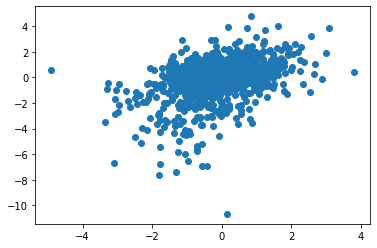

In [ ]:
plt.scatter(pre_y, y_test)

In [ ]:
a1 = pd.DataFrame(pre_y)

In [ ]:
a2 = pd.DataFrame(y_test.values)

In [ ]:
acy = pd.concat([a1,a2],axis=1)
acy.columns = ['predict', 'real']
acy

,predict,real
0,-0.232103,0.784937
1,-0.553966,-5.192625
2,0.694226,-1.868522
3,0.793625,-0.470234
4,-0.833995,-0.288166
...,...,...
964,-0.914156,-1.390479
965,-0.056518,0.446074
966,-0.613721,-1.312060
967,0.741005,-0.085889


In [ ]:
np.corrcoef(acy['predict'],acy['real'])

array([[1.        , 0.41927867],
       [0.41927867, 1.        ]])

In [ ]:
err = abs(acy['predict']-acy['real'])
np.mean(err/abs(acy['real']))

2.8671219958959653

In [ ]:
##############################################################

In [ ]:
#category

In [ ]:
y = data['gross_US_sales']/data['budget']-1

In [ ]:
ctgy = lambda x: -2 if x<-0.5 else (-1 if x <= 0 and x>=-0.5 else (1 if x>0 and x<1 else 2))

In [ ]:
y = y.apply(ctgy)

In [ ]:
y.unique()
# where 2 means investment return > 100%, 1 means >0, -1 means lost less than 50% and -2 means lost more than 50%

array([ 2,  1, -1, -2], dtype=int64)

In [ ]:
y_ctg = y.values.reshape(-1,1)

In [ ]:

ohe = OneHotEncoder()
y = ohe.fit_transform(y_ctg).toarray()

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [ ]:
# Neural network

model = Sequential()
model.add(Dense(20, input_dim=38, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train,validation_data = (x_test,y_test), epochs=100, batch_size=44)

Train on 3872 samples, validate on 969 samples
Epoch 1/100
3872/3872 [==============================] - 0s 68us/step - loss: 1.4531 - accuracy: 0.2647 - val_loss: 1.3764 - val_accuracy: 0.2859
Epoch 2/100
3872/3872 [==============================] - 0s 33us/step - loss: 1.3828 - accuracy: 0.2691 - val_loss: 1.3637 - val_accuracy: 0.3385
Epoch 3/100
3872/3872 [==============================] - 0s 38us/step - loss: 1.3688 - accuracy: 0.3334 - val_loss: 1.3578 - val_accuracy: 0.3725
Epoch 4/100
3872/3872 [==============================] - 0s 39us/step - loss: 1.3587 - accuracy: 0.3458 - val_loss: 1.3499 - val_accuracy: 0.3798
Epoch 5/100
3872/3872 [==============================] - 0s 34us/step - loss: 1.3480 - accuracy: 0.3585 - val_loss: 1.3422 - val_accuracy: 0.3798
Epoch 6/100
3872/3872 [==============================] - 0s 38us/step - loss: 1.3396 - accuracy: 0.3812 - val_loss: 1.3344 - val_accuracy: 0.3922
Epoch 7/100
3872/3872 [==============================] - 0s 35us/step - loss:

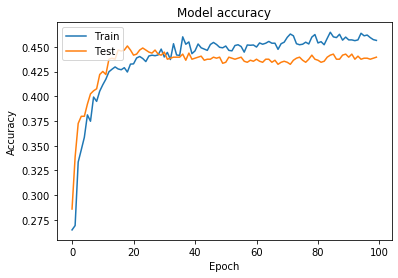

In [ ]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

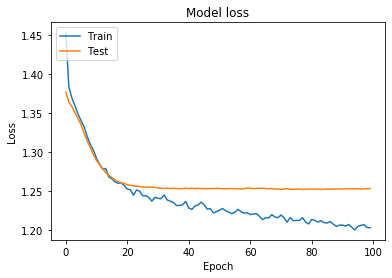

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()